Import packages

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Load and read CSV

In [68]:
file_path = r'C:\Users\vgrec\Desktop\Coffee Sales\Coffee_Sales.csv'
df = pd.read_csv(file_path)

### **Exploratory Data Analysis (EDA)**

In [69]:
#Dimentions of the data
print(f"The Number of Rows are {df.shape[0]}, and columns are {df.shape[1]}.")

The Number of Rows are 1133, and columns are 6.


In [70]:
print(df.size)

6798


In [71]:
#Display the first few rows of data
print("First few rows of data:")
print(df.head())

First few rows of data:
         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  


In [72]:
#Get information about the dataset
print("Dataset information:")
print(df.info())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB
None


In [73]:
# Basic statistics
print("Basic statistics:")
print(df.describe())
print(df.describe(include=['object']))

Basic statistics:
             money
count  1133.000000
mean     33.105808
std       5.035366
min      18.120000
25%      28.900000
50%      32.820000
75%      37.720000
max      40.000000
              date                 datetime cash_type                 card  \
count         1133                     1133      1133                 1044   
unique         150                     1133         2                  446   
top     2024-07-30  2024-03-01 10:15:50.520      card  ANON-0000-0000-0012   
freq            24                        1      1044                   88   

                coffee_name  
count                  1133  
unique                    8  
top     Americano with Milk  
freq                    268  


In [74]:
# Check the dublicated data
print("The dublicated data:")
print(df.duplicated().sum())

The dublicated data:
0


In [75]:
# Check for missing values
print("Number of missing values in each column:")
print(df.isnull().sum())

Number of missing values in each column:
date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


### *Conclusions:*
- *The dataset contains 1133 records and 6 columns, with one column being numeric and the remaining columns categorical.*
- *There are no duplicate records in the dataset, which is a positive aspect for further analysis.*
- *89 missing values are present in the 'card' column.*
- *The basic statistics for the 'money' column indicate an average coffee price of approximately 33.11 units with minor deviations.*
- *The 'coffee_name' column shows that 'Americano with Milk' has the highest sales volume.*
- *For further time-based analysis, the date and datetime columns, which are currently of type object, will need to be converted to proper date formats. This conversion will enable more effective time-series analysis and utilization of time-based functionalities.*

Let's examine the transactions where the 'card' value is missing

In [76]:
# Display the unique values in the 'cash_type' column
print("Unique values in 'cash_type' column:")
print(df['cash_type'].unique())

Unique values in 'cash_type' column:
['card' 'cash']


In [77]:
# Count the occurrences of each 'cash_type' value with and without missing 'card' values
cash_type_counts = (
    df.groupby(['cash_type', df['card'].isnull()])
    .size()
    .unstack(fill_value=0)
)
print("Count of 'cash_type' values with and without missing 'card' values:")
print(cash_type_counts)

Count of 'cash_type' values with and without missing 'card' values:
card       False  True 
cash_type              
card        1044      0
cash           0     89


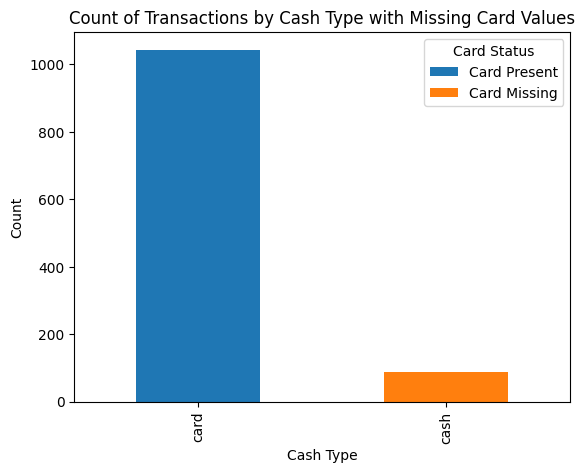

In [78]:
# Visualize the relationship between 'cash_type' and missing 'card' values
cash_type_counts.plot(kind='bar', stacked=True)
plt.xlabel('Cash Type')
plt.ylabel('Count')
plt.title('Count of Transactions by Cash Type with Missing Card Values')
plt.legend(['Card Present', 'Card Missing'], title='Card Status')
plt.show()

*The bar chart visualizes the count of transactions by cash type and the presence or absence of card values. It shows that all transactions recorded as 'card' have a valid card value, while transactions recorded as 'cash' do not have a card value. Missing card values are due to the transaction type rather than data issues. As the card column does not provide additional insights for our analysis, we can consider removing it to simplify the dataset.*

In [79]:
# Remove the 'card' column from the DataFrame
df = df.drop('card', axis=1)

In [80]:
# Verify that the 'card' column has been removed
print("Columns after removing the 'card' column:")
print(df.columns)

Columns after removing the 'card' column:
Index(['date', 'datetime', 'cash_type', 'money', 'coffee_name'], dtype='object')


#### Coffee Sales by Transaction Type and Coffee Type

In [81]:
cash_type_data = df[df['cash_type'] == 'card']

# Group by 'cash_type' and 'coffee_name', and count the occurrences
coffee_counts_by_transaction = (
    df.groupby(['cash_type', 'coffee_name'])
    .size()
    .reset_index(name='Count')
    .sort_values(by='Count', ascending=False)
)

coffee_counts_by_transaction = coffee_counts_by_transaction.rename(columns={
    'cash_type': 'Transaction Type',
    'coffee_name': 'Coffee Type',
    'Count': 'Count'
})

print('Number Coffee Sales by Transaction Type')
print(coffee_counts_by_transaction.to_string(index=False))

Number Coffee Sales by Transaction Type
Transaction Type         Coffee Type  Count
            card Americano with Milk    253
            card               Latte    218
            card          Cappuccino    181
            card           Americano    155
            card             Cortado     94
            card       Hot Chocolate     68
            card            Espresso     44
            card               Cocoa     31
            cash               Latte     25
            cash Americano with Milk     15
            cash          Cappuccino     15
            cash           Americano     14
            cash       Hot Chocolate      6
            cash             Cortado      5
            cash            Espresso      5
            cash               Cocoa      4


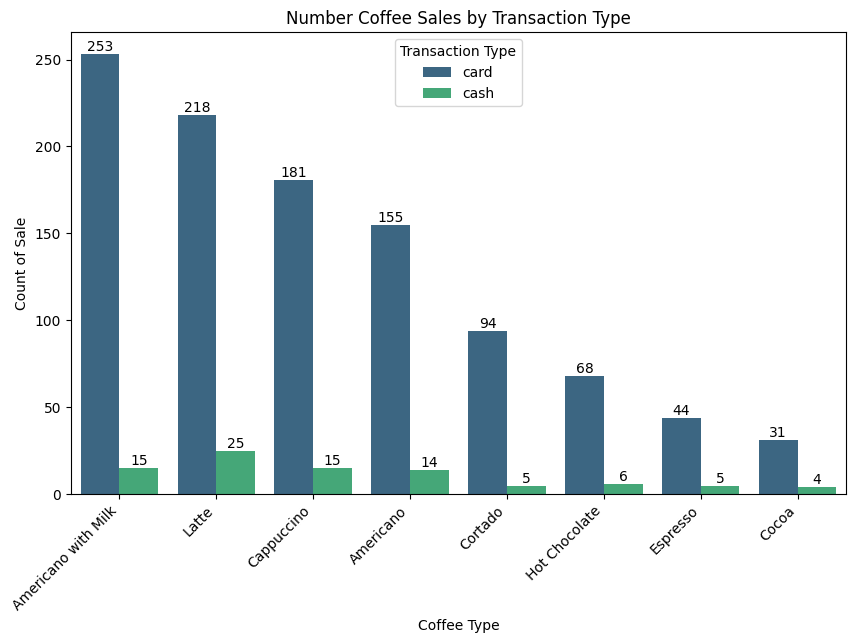

In [82]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Coffee Type', y='Count', hue='Transaction Type', data=coffee_counts_by_transaction, palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.xlabel('Coffee Type')
plt.ylabel('Count of Sale')
plt.title('Number Coffee Sales by Transaction Type')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Transaction Type', loc='upper center')
plt.show()

*This plot displays the count of coffee sales for different coffee types in relation to the type of transaction.*

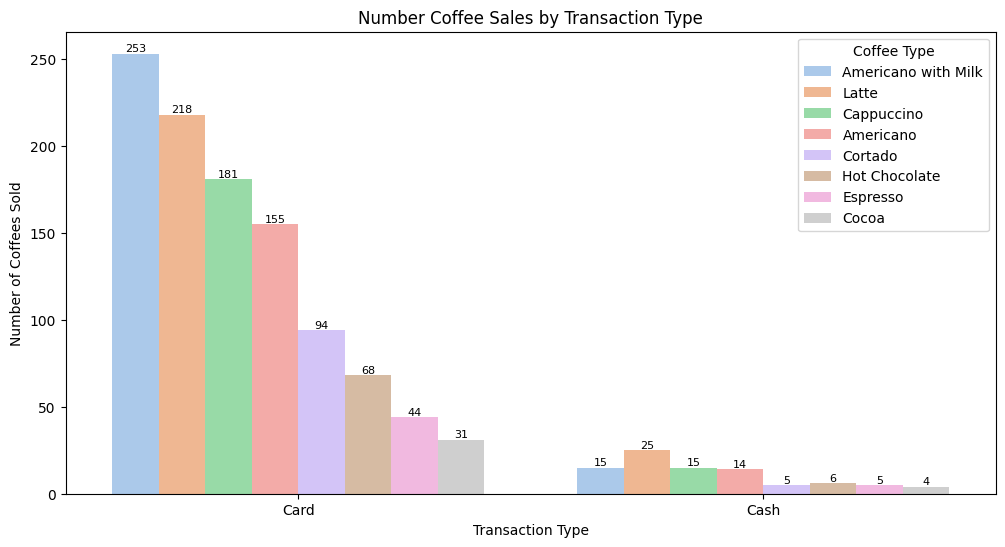

In [83]:
plt.figure(figsize=(12, 6))
palette = sns.color_palette("pastel", n_colors=8)
ax = sns.barplot(x='Transaction Type', y='Count', hue='Coffee Type', data=coffee_counts_by_transaction, palette=palette)
for container in ax.containers:
    ax.bar_label(container, fontsize=8)
plt.xlabel('Transaction Type')
plt.ylabel('Number of Coffees Sold')
plt.title('Number Coffee Sales by Transaction Type')
plt.legend(title='Coffee Type')
plt.xticks(ticks=[0, 1], labels=['Card', 'Cash'])   
plt.show()

*This plot presents the total number of coffees sold by each transaction type, with a breakdown by coffee type. For card transactions, Americano with Milk (253), Latte (218) and Cappuccino (181) were the top three most frequently sold coffee types. In contrast, Cocoa had the lowest count at 31. For cash actions, Latte (25), Americano with Milk (15), and Cappuccino (15) had the highest counts, while Cocoa had the lowest count at 4.*

#### Total Revenue from Coffee Sales by Transaction Type and Coffee Type

In [84]:
# Group and aggregate the data by 'cash_type' and 'coffee_name'
sales_by_transaction_and_coffee_sort = (
    df.groupby(['cash_type', 'coffee_name'])['money']
    .sum()
    .reset_index()
    .sort_values(by='money', ascending=False)
)

sales_by_transaction_and_coffee_sort = sales_by_transaction_and_coffee_sort.rename(columns={
    'cash_type': 'Transaction Type',
    'coffee_name': 'Coffee Type',
    'money': 'Total Revenue'
})

print('Total Revenue from Coffee Sales by Transaction Type and Coffee Type')
print(sales_by_transaction_and_coffee_sort.to_string(index=False))

Total Revenue from Coffee Sales by Transaction Type and Coffee Type
Transaction Type         Coffee Type  Total Revenue
            card Americano with Milk        8083.94
            card               Latte        8018.14
            card          Cappuccino        6738.14
            card           Americano        4232.54
            card             Cortado        2595.08
            card       Hot Chocolate        2539.48
            card               Cocoa        1138.94
            cash               Latte         991.00
            card            Espresso         976.62
            cash          Cappuccino         595.00
            cash Americano with Milk         518.00
            cash           Americano         412.00
            cash       Hot Chocolate         239.00
            cash               Cocoa         157.00
            cash             Cortado         150.00
            cash            Espresso         124.00


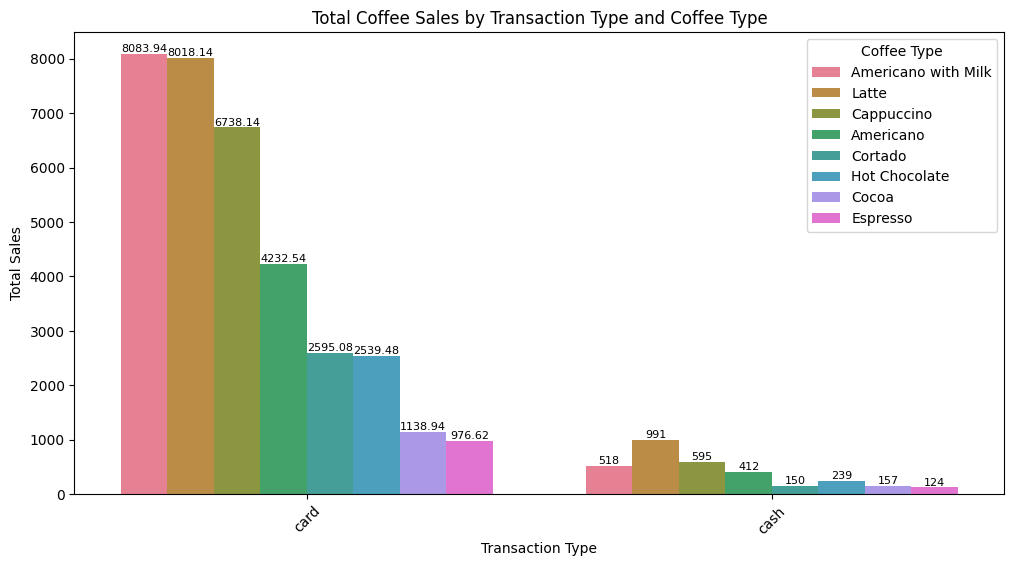

In [85]:
plt.figure(figsize=(12, 6))
palette = sns.color_palette("husl", n_colors=8)
ax = sns.barplot(x='Transaction Type', y='Total Revenue', hue='Coffee Type', data=sales_by_transaction_and_coffee_sort, palette=palette)

plt.xlabel('Transaction Type')
plt.ylabel('Total Sales')
plt.title('Total Coffee Sales by Transaction Type and Coffee Type')
for container in ax.containers:
    ax.bar_label(container, fontsize=8)
plt.xticks(rotation=45)  
plt.legend(title='Coffee Type')
plt.show()

*Americano with Milk (8083.94), Latte (8018.14) and Cappuccino (6738.14) generated the highest revenue among card transactions, while Espresso brought in the least revenue at 976.62. For cash transactions, Latte (991.00), Cappuccino (595.00), and Americano with Milk (518.00) generated the highest revenue, while Espresso brought in the least revenue at 124.00. Notably, Latte's revenue for cash transactions (991.00) exceeded the revenue of Espresso from card payments (976.62).*

Let’s develop a function to calculate percentages to simplify subsequent calculations. This function will automatically compute the percentage for each value in a specified count column and store these percentages in a new column called 'percentage'. This will make our analyses clearer and more convenient for further work.

In [86]:
def calculate_percentage(df, count_column):
    """
    Function to calculate percentages based on a count_column and a total count.
    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    count_column (str): Name of the column with count values.

    Returns:
    pd.DataFrame: DataFrame with an added 'percentage' column that contains the calculated percentages.
    """
    total_count = df[count_column].sum()
    df['Percentage'] = (df[count_column] / total_count).round(4) * 100
    return df

Calculate and Display Cash Type Frequencies and Percentages

In [87]:
# Counting values in 'cash_type' column
cash_type_counts = (
    df['cash_type']
    .value_counts()
    .rename_axis('Transaction Type')
    .reset_index(name='Count')
)

In [88]:
# Calculate percentage using the function
cash_type_counts = calculate_percentage(cash_type_counts, 'Count')

# Display cash type counts with percentage
print("Cash type counts with percentage:")
print(cash_type_counts.to_string(index=False))

Cash type counts with percentage:
Transaction Type  Count  Percentage
            card   1044       92.14
            cash     89        7.86


*The analysis of the 'cash_type' column reveals that 92.14% of transactions were made with a card, while 7.86% were made with cash.*

### Analysis of Price Fluctuations for Different Coffee Types depending on the type of payment

In [89]:
# Display the unique values in the 'coffee_name' column
print("Unique values in 'coffee_name' column:")
coffee_names = df['coffee_name'].unique()
print(coffee_names)

Unique values in 'coffee_name' column:
['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino']


In [90]:
number_coffee = len(coffee_names)
print(number_coffee)

8


In [91]:
df['date']

0       2024-03-01
1       2024-03-01
2       2024-03-01
3       2024-03-01
4       2024-03-01
           ...    
1128    2024-07-31
1129    2024-07-31
1130    2024-07-31
1131    2024-07-31
1132    2024-07-31
Name: date, Length: 1133, dtype: object

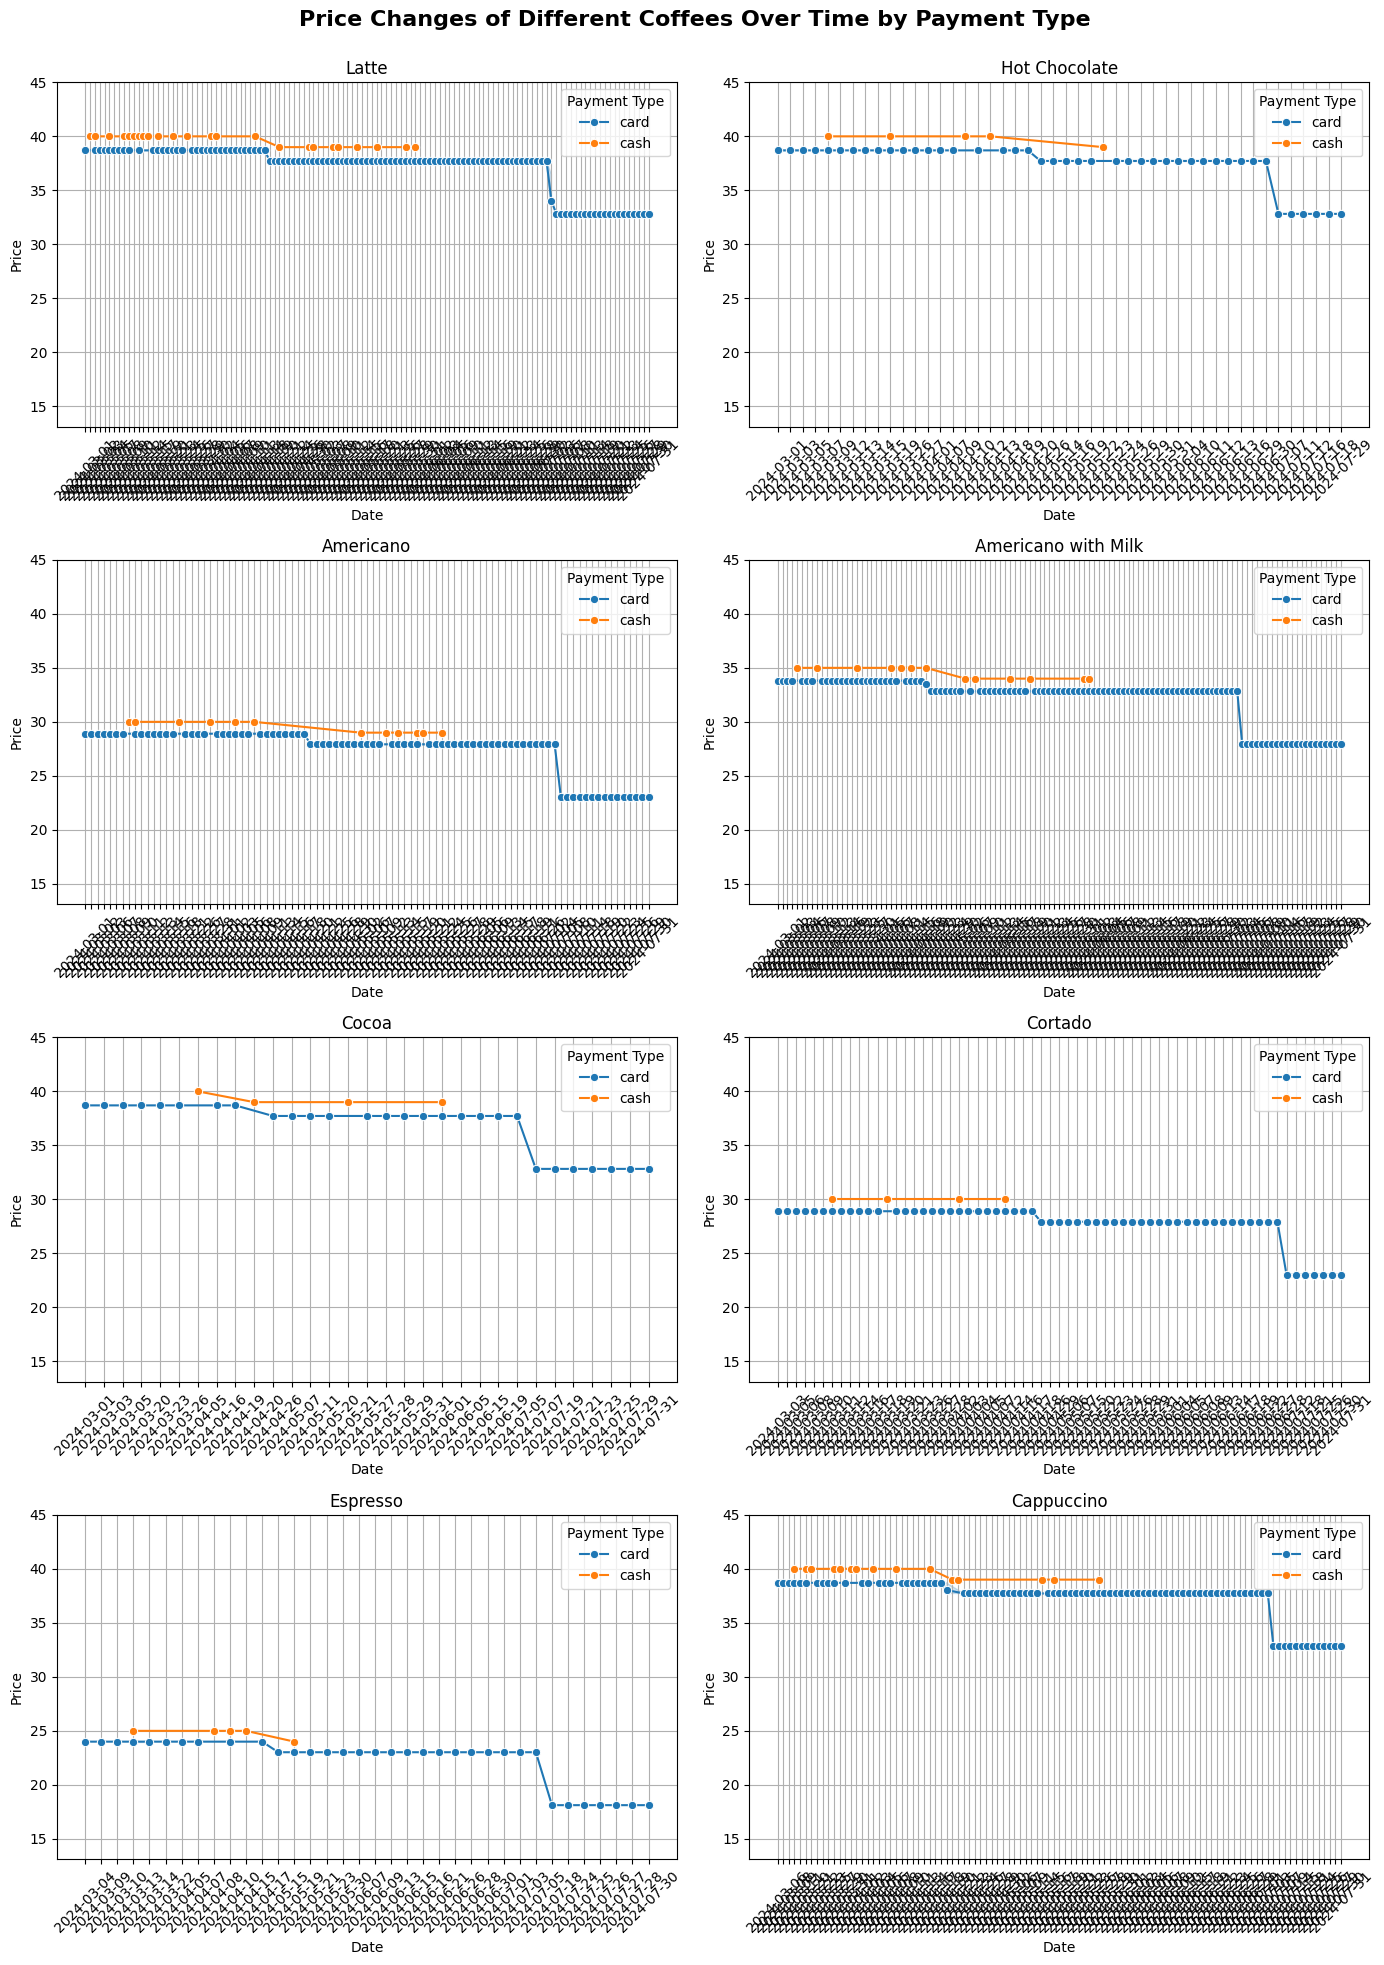

In [92]:
# Determine the overall y-axis limits (min and max) for all coffee types. 
# Using the same scale for the y-axis across all subplots allows for more consistent and meaningful comparisons between different plots
y_min = df['money'].min()
y_max = df['money'].max()

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))
axes = axes.flatten()

fig.suptitle('Price Changes of Different Coffees Over Time by Payment Type', fontsize=16, fontweight='bold')
# Iterate through each coffee type and create a subplot
for i, coffee in enumerate(coffee_names):
    coffee_data = df[df['coffee_name'] == coffee]
    sns.lineplot(data=coffee_data, x='date', y='money', hue='cash_type', marker='o', ax=axes[i])
    axes[i].set_title(coffee)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price')
    axes[i].set_ylim(y_min-5, y_max+5)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Payment Type')
    axes[i].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.98]) 
plt.show()


*The analysis indicates that prices for each type of coffee were consistently lower when paid by card compared to cash. This trend might be due to various factors, such as promotional discounts for card transactions, lower processing fees for electronic payments, or incentives provided by coffee shops to encourage card use. Additionally, there was a general decrease in unit prices for all coffee types, regardless of payment method, with the price drops occurring on separate, yet closely timed dates. This gradual decrease in prices could be a strategy to boost sales, as the reductions were modest rather than drastic.*

##### The average price for each coffee type

In [93]:
# Calculate the average price for each coffee type
average_price_coffee = (
    df.groupby('coffee_name')['money']
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by='money', ascending=False)
)

average_price_coffee = average_price_coffee.rename(columns={
    'coffee_name': 'Coffee Type',
    'money': 'Average Price'
})

print("Average Price for Each Coffee Type:")
print(average_price_coffee.to_string(index=False))

Average Price for Each Coffee Type:
        Coffee Type  Average Price
      Hot Chocolate          37.55
         Cappuccino          37.41
              Latte          37.07
              Cocoa          37.03
Americano with Milk          32.10
            Cortado          27.73
          Americano          27.48
           Espresso          22.46


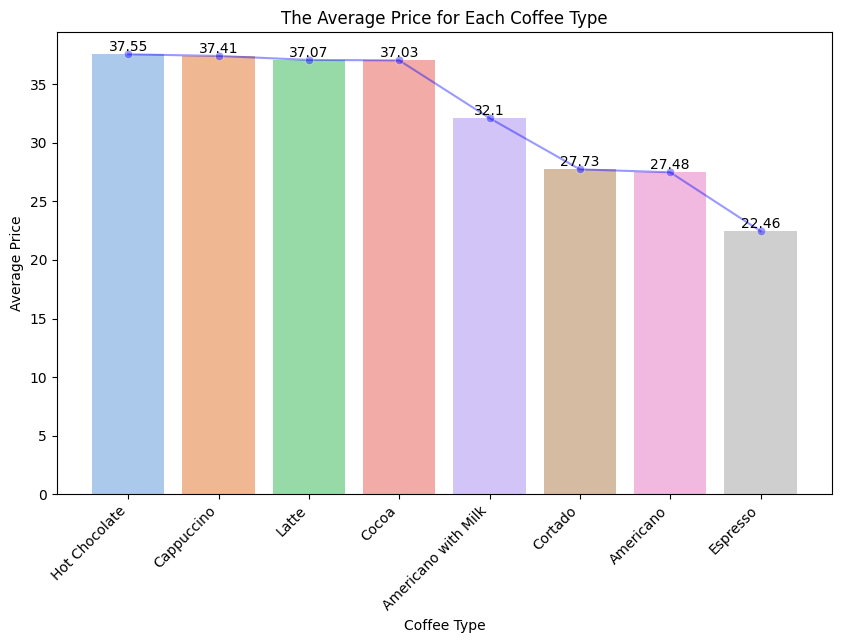

In [94]:
plt.figure(figsize=(10, 6))

# Bar plot
palette = sns.color_palette("pastel", n_colors=len(average_price_coffee))
ax = sns.barplot(x='Coffee Type', y='Average Price', data=average_price_coffee, palette=palette, hue='Coffee Type')
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

# Line plot
sns.lineplot(x='Coffee Type', y='Average Price', data=average_price_coffee, color='blue', marker='o', ax=ax, alpha=0.4)

plt.xlabel('Coffee Type')
plt.ylabel('Average Price')
plt.title('The Average Price for Each Coffee Type')
plt.xticks(rotation=45, ha='right')

plt.show()

*The analysis reveals that Hot Chocolate has the highest average price at 37.55, followed closely by Cappuccino at 37.41 and Latte at 37.07. On the other hand, Espresso has the lowest average price at 22.46. This indicates that more complex or specialty drinks tend to be priced higher, while simpler options like Espresso are more affordable.*

### Coffee Sales by Coffee Type

#### Number of Coffee Sales by Coffee Type

In [95]:
# Count the number of each type of coffee sold
coffee_counts = (
    df['coffee_name']
    .value_counts()
    .rename_axis('Coffee Type')
    .reset_index(name='Count')
)

# Calculate percentage using the function
coffee_counts = calculate_percentage(coffee_counts, 'Count')

print('Counts and Percentages of Each Coffee Type Sold:')
print(coffee_counts.to_string(index=False))

Counts and Percentages of Each Coffee Type Sold:
        Coffee Type  Count  Percentage
Americano with Milk    268       23.65
              Latte    243       21.45
         Cappuccino    196       17.30
          Americano    169       14.92
            Cortado     99        8.74
      Hot Chocolate     74        6.53
           Espresso     49        4.32
              Cocoa     35        3.09


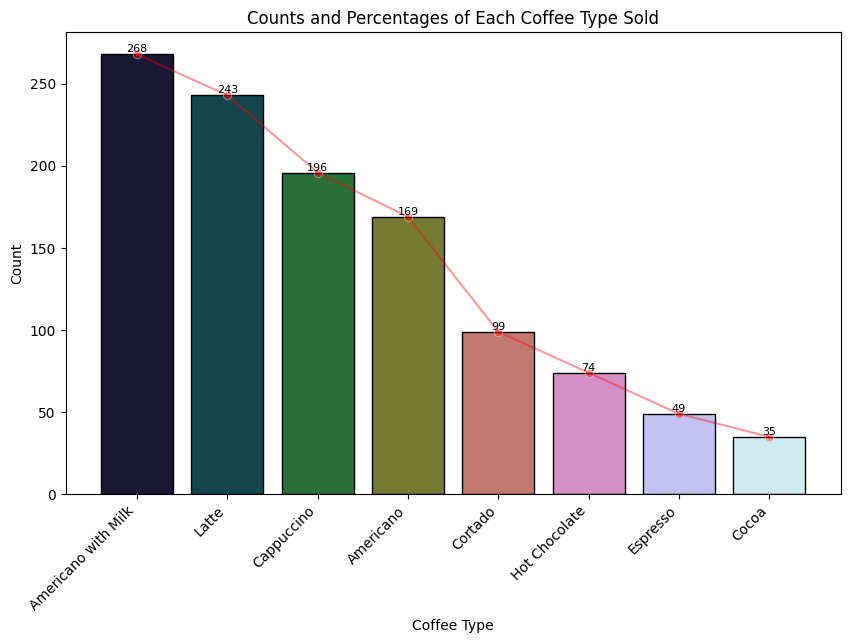

In [96]:
plt.figure(figsize=(10, 6))
ax = plt.gca()  # Get current axis
palette = sns.color_palette("cubehelix", n_colors=len(coffee_counts))

# Bar plot
bars = ax.bar(coffee_counts['Coffee Type'], coffee_counts['Count'], color=palette, edgecolor='black')

# Line plot
sns.lineplot(x='Coffee Type', y='Count', data=coffee_counts, color='red', marker='o', ax=ax, alpha=0.4)

ax.bar_label(bars, fontsize=8)

plt.xlabel("Coffee Type")
plt.ylabel("Count")
plt.title("Counts and Percentages of Each Coffee Type Sold")
plt.xticks(rotation=45, ha='right')

plt.show()

#### Total Revenue from Coffee Sales by Coffee Type

In [97]:
# Calculate total sales for each type of coffee
coffee_sales = (
    df.groupby('coffee_name')['money']
    .sum()
    .reset_index(name='Total Sales')
)

# Rename the column 'coffee_name' to 'Coffee Type'
coffee_sales = coffee_sales.rename(columns={'coffee_name': 'Coffee Type'})

# Calculate percentage using the function
coffee_sales = calculate_percentage(coffee_sales, 'Total Sales')

# Sort by Total Sales in descending order
coffee_sales = coffee_sales.sort_values(by='Total Sales', ascending=False)

# Print total sales and percentage for each type of coffee
print("Total sales and percentage for each type of coffee:")
print(coffee_sales.to_string(index=False))

Total sales and percentage for each type of coffee:
        Coffee Type  Total Sales  Percentage
              Latte      9009.14       24.02
Americano with Milk      8601.94       22.93
         Cappuccino      7333.14       19.55
          Americano      4644.54       12.38
      Hot Chocolate      2778.48        7.41
            Cortado      2745.08        7.32
              Cocoa      1295.94        3.46
           Espresso      1100.62        2.93


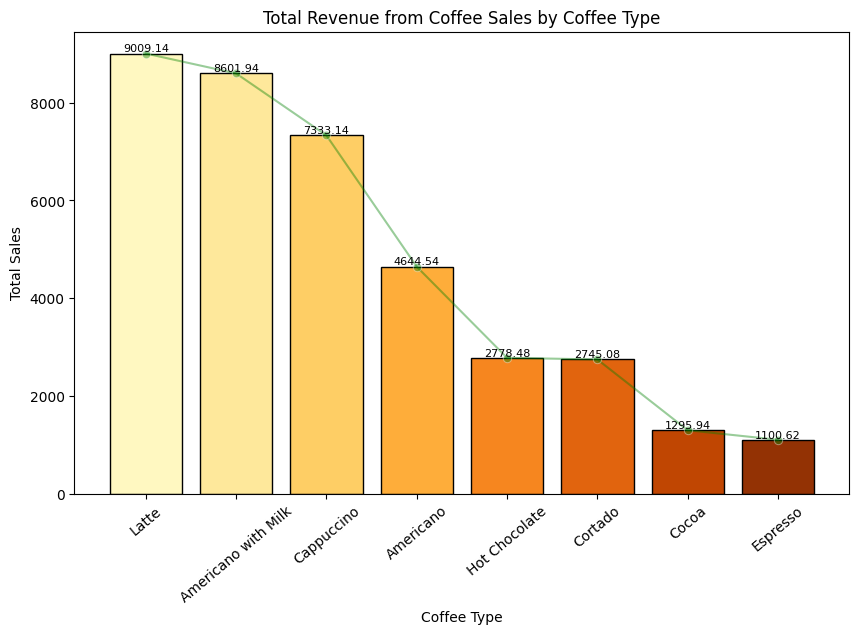

In [98]:
plt.figure(figsize=(10, 6))
ax = plt.gca()  # Get current axis

palette = sns.color_palette("YlOrBr", n_colors=len(coffee_sales))

# Bar plot
bars = ax.bar(coffee_sales['Coffee Type'], coffee_sales['Total Sales'], color=palette, edgecolor='black')

# Line plot
sns.lineplot(x='Coffee Type', y='Total Sales', data=coffee_sales, color='green', marker='o', ax=ax, alpha=0.4)

ax.bar_label(bars, fontsize=8)

plt.xlabel("Coffee Type")
plt.ylabel("Total Sales")
plt.title("Total Revenue from Coffee Sales by Coffee Type")
plt.xticks(rotation=40)

plt.show()

Percentage of Total Sales by Coffee Type

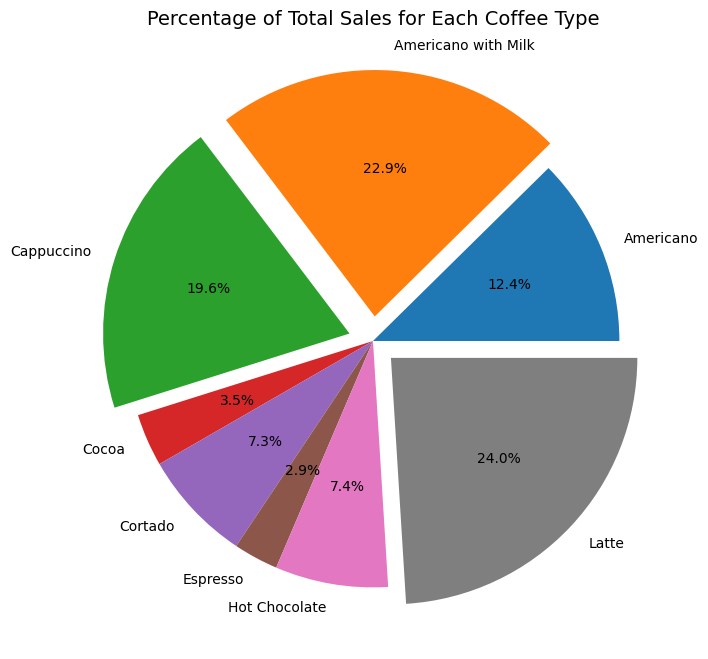

In [99]:
# Aggregate sales data by coffee type
coffee_sales = (
    df.groupby('coffee_name')['money']
    .sum()
    .reset_index()
)    
explode = (0, 0.1, 0.1, 0, 0, 0, 0, 0.1) 
plt.figure(figsize=(8, 8))
plt.pie(coffee_sales['money'], labels=coffee_sales['coffee_name'], explode=explode, autopct='%1.1f%%')
plt.title('Percentage of Total Sales for Each Coffee Type', fontsize=14)
plt.show()

*Latte, Americano with Milk and Cappuccino have the highest metrics both in terms of the number of units sold and total sales. Consequently, these types of coffee are likely to be strategically important for the business indicating a strong preference among customers for these specific varieties. Latte generates the most revenue, while Americano with Milk sells the most units, likely due to Latte's higher price. Conversely, Cocoa and Espresso  have the lowest sales figures. These types of coffee may require marketing or pricing strategies to boost their sales or popularity.*